
# Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visually: 


## Regplot

### high correlation

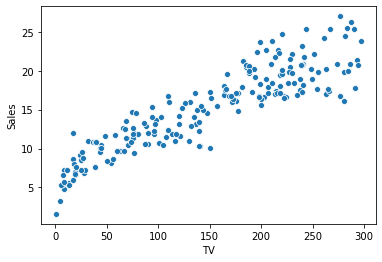

In [5]:
sns.scatterplot(df.TV, df.Sales)

# explicativas: TV, Radio, Newspaper (X)
# target: Sales (y)

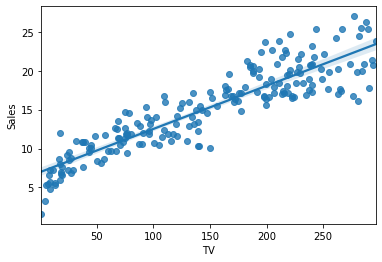

In [6]:
sns.regplot(df.TV, df.Sales)

What did you see specifically to check that the correlation was high?


<b>The dispersion of the data as compared to the straight line.</b>

### low correlation

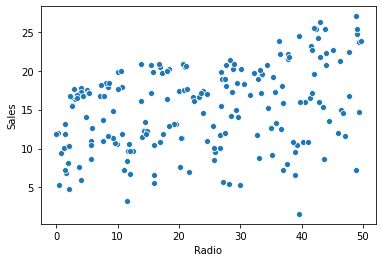

In [7]:
sns.scatterplot(df.Radio, df.Sales)

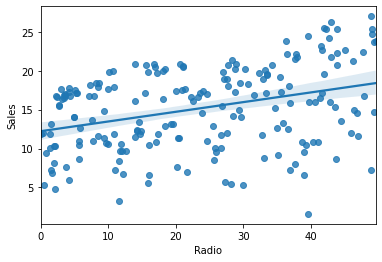

In [8]:
sns.regplot(df.Radio, df.Sales)

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


## Pairwise visualization

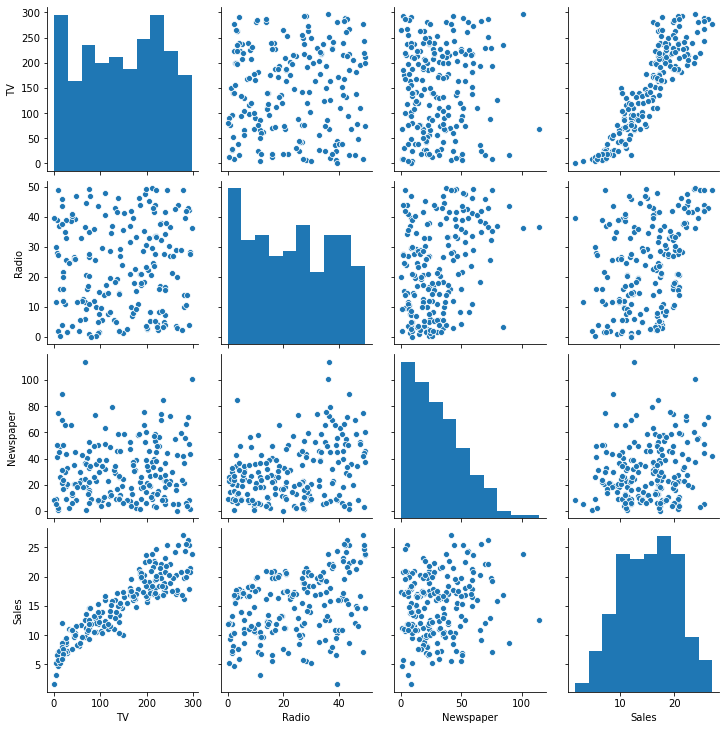

In [11]:
sns.pairplot(df)

# Numerically

In [14]:
import numpy as np

In [15]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


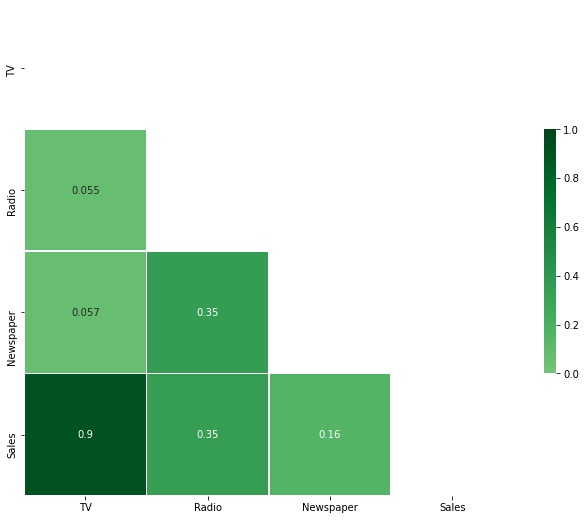

In [16]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Greens', vmin=.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

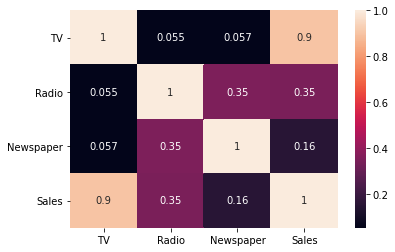

In [17]:
sns.heatmap(corr, annot=True)

# Simple Linear Regression

In [18]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


![title](lin_reg.png)

## How to obtain it in practice?

- import LinearRegression model from the scikit-learn library

In [ ]:
!pip install scikit-learn

In [12]:
from sklearn.linear_model import LinearRegression

- Instantiate the linear regression model. Up to this point, model has nothing inside of it.

In [20]:
model = LinearRegression()

In [21]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Separate your variables:
    - X: your predictive variables - or explicative variables (should be a **pandas dataframe or n-D numpy array**)
    - y: the variable you want to predict - or target (should be a **pandas series or 1-D numpy array**)

In [22]:
X = df[['TV']]
y = df['Sales']

In [23]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In this case, I want to predict `y = sales`  given the value I invest in `X = TV` advertising.

- `model.fit(X, y)` is the most important step in our linear regression. It will `train` our model. Specifically, it will calculate the values of the `intercept` and the `coefficients`

In [25]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model

- After training your model, you can use the method 
    - `model.predict(X)`

to obtain a predicted value of `Sales` given a value of `TV`.

Say we want to know the value our model predicts for `TV = 100`. We have to pass a dataframe like the one we've used to `train` our model.

In [26]:
data_to_predict = pd.DataFrame([100], columns=['TV'])
data_to_predict

,TV
0,100


In [27]:
model.predict(data_to_predict)

array([12.52129854])

- We can also predict several values at once:


In [28]:
data_to_predict = pd.DataFrame([100, 150, 200, 250, 300, 350, 400, 450], columns=['TV'])
data_to_predict

,TV
0,100
1,150
2,200
3,250
4,300
5,350
6,400
7,450


In [29]:
model.predict(data_to_predict)

array([12.52129854, 15.29453706, 18.06777558, 20.84101411, 23.61425263,
       26.38749115, 29.16072968, 31.9339682 ])

- We can also predict our whole dataset

In [31]:
y_pred = model.predict(X)
y_pred

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263,
       10.64104282, 18.88310771,  8.29488303, 12.38263661, 18.29518114,
       17.81263764, 10.73533293, 22.5826079 , 10.8129836 , 15.14478218,
       19.08832736, 20.142158  ,  7.70695646, 19.63742859, 10.43027669,
       21.55650964, 14.90073719, 20.29191288, 20.77445638, 10.89063428,
       23.22045276, 13.23679407, 12.36599718, 21.70626452, 12.28280002,
       23.09843026, 21.77836873, 11.11803984,  9.3653531 , 19.62078916,
       18.20643751, 16.79208586, 23.2592781 , 18.4504825 ,  8.36698723,
       16.6867028 , 11.9500114 , 20.28081992, 19.57641734, 10.68541463,
       18.05668263, 12.54348444, 18.97739782, 17.10268858, 21.54541669,
       18.00676433,  7.37971431, 14.52912323, 18.6667951 , 18.66124863,
        9.94218671, 21.46776601, 20.24754106, 12.67105342, 14.2462529 ,
       10.80189065,  8.72196176, 14.70106401, 20.142158  , 18.99

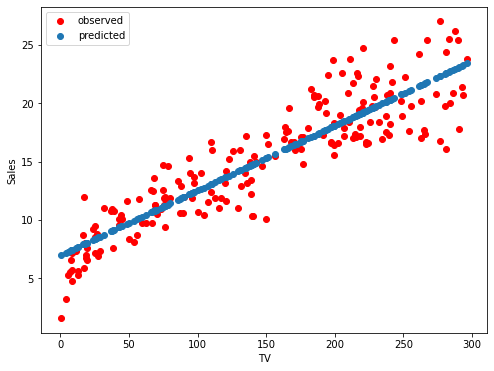

In [33]:
plt.figure(figsize=(8,6))
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(X, y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X, model.predict(X), label='predicted')


plt.legend()

- Now that we've trained our model, we are also able to obtain the coefficients and intercept via the methods
    - `model.coef_`
    - `model.intercept`


But let's understand what they mean.

In [34]:
model.coef_

array([0.05546477])

In [ ]:
1 - 0.05546477
x - 1

In [37]:
1/0.05546477 * 5 

90.14731333060608

In [40]:
model.predict(pd.DataFrame([100], columns=['TV']))

array([12.52129854])

In [38]:
0.05546477 * 100 + 6.974821488229891

12.52129848822989

<b> If I change 1 unit of investment in TV, i gain 0.055 uints of Sales </b>

In [35]:
model.intercept_

6.974821488229891

<b> The value of sales for which TV equals 0  is ~6.97 </b>

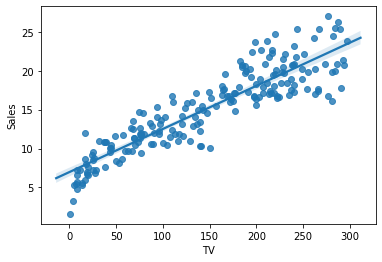

In [41]:
sns.regplot(df.TV, df.Sales)